# 十一 PCA 主成分分析

## 1 降维

用于减少数据集的维数，同时尽可能保留数据的重要信息。采用某种映射方法，将原高维空间中的数据点映射到低维度的空间中

- 分类
  - 直接降维，特征选择
  - 线性降维，PCA，MDS等
  - 分线性，流形包括 Isomap，LLE 等


![pca-2](./images/ch11/pca-2.png)

## 2 PCA 主成分分析

基本想法是将所有数据投影到一个子空间中，从而达到降维的目标，为了寻找这个子空间，基本想法是：

1. 所有数据在子空间中更为分散
2. 损失的信息最小，即：在补空间的分量少

- 协方差矩阵

$$
\begin{aligned}
S &=\frac{1}{N} X^{T} H X
\end{aligned}
$$

- 公式

    原来的数据很有可能各个维度之间是相关的，于是我们希望找到一组 $p$ 个新的线性无关的单位基 $u_i$，降维就是取其中的 $q$ 个基。于是对于一个样本 $x_i$，经过这个坐标变换后
$$
\hat{x_i}=\sum\limits_{i=1}^p(u_i^Tx_i)u_i=\sum\limits_{i=1}^q(u_i^Tx_i)u_i+\sum\limits_{i=q+1}^p(u_i^Tx_i)u_i
$$

- 损失函数

$$
\begin{aligned}
J &=\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{q}\left(\left(x_{i}-\bar{x}\right)^{T} u_{j}\right)^{2} \\
&=\sum_{j=1}^{q} u_{j}^{T} S u_{j}, \text { s.t. } u_{j}^{T} u_{j}=1
\end{aligned}
$$

$$
\mathop{argmin}_{u_j}L(u_j,\lambda)=\mathop{argmin}_{u_j}u_j^TSu_j+\lambda(1-u_j^Tu_j)
$$

/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


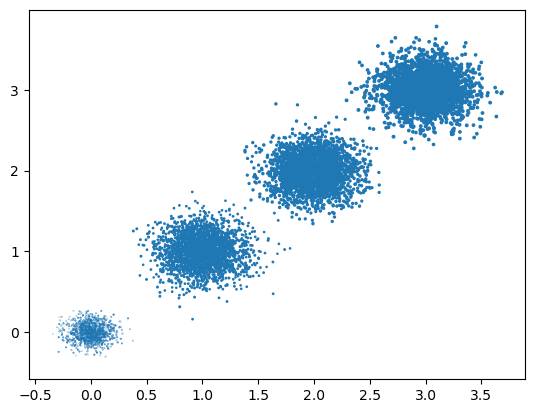

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
%matplotlib inline

# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

将数据集分为k个簇，每个簇的中心点代表每个簇，将数据点划分到距离其中心点最近的簇中，计算每个簇的均值，重新划分该簇的中心点，迭代计算，直到收敛

In [9]:
#我们先不降维，只对数据进行投影，看看投影后的三个维度的方差分布，代码如下：
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


可以看出投影后三个特征维度的方差比例大约为98.3%：0.8%：0.8%。投影后第一个特征占了绝大多数的主成分比例。

In [10]:
#现在我们来进行降维，从三维降到2维，代码如下：
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]


这个结果其实可以预料，因为上面三个投影后的特征维度的方差分别为：[ 3.78483785 0.03272285 0.03201892]，投影到二维后选择的肯定是前两个特征，而抛弃第三个特征。

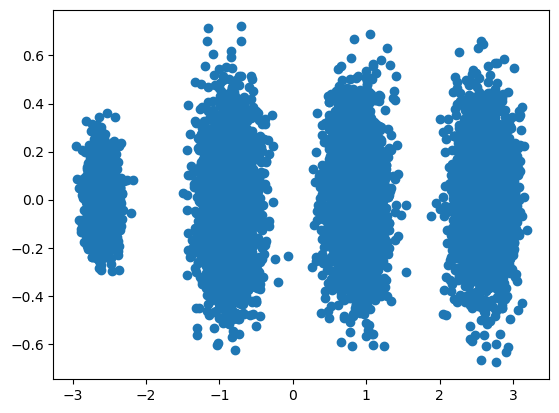

In [11]:
#为了有个直观的认识，我们看看此时转化后的数据分布，代码如下：
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

In [12]:
#现在我们看看不直接指定降维的维度，而指定降维后的主成分方差和比例。
print('n_components=0.95')
pca = PCA(n_components=0.95)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)    # 结果显示降到了1维

print('n_components=0.99')
pca = PCA(n_components=0.99)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)    # 结果显示降到2维

# 让MLE算法自己选择降维维度
print('n_components=mle')
pca = PCA(n_components='mle')
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

n_components=0.95
[0.98318212]
[3.78521638]
1
n_components=0.99
[0.98318212 0.00850037]
[3.78521638 0.03272613]
2
n_components=mle
[0.98318212]
[3.78521638]
1


解释方差比率: [0.92461872 0.05306648]


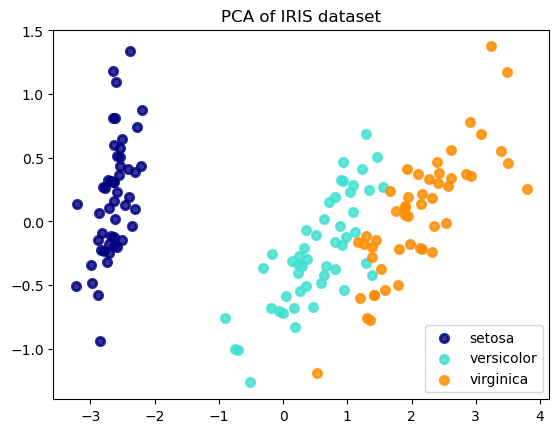

In [6]:
# 在这个例子中，PCA 用于将鸢尾花数据集的 4 个特征降维到 2 个。
# 然后，我们打印出每个主成分的解释方差比率，并使用散点图将降维后的数据可视化。每种颜色代表一种鸢尾花的品种
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 初始化 PCA，设置降维后的主成分数量为 2
pca = PCA(n_components=2)

# 对数据进行降维处理
X_r = pca.fit_transform(X)

# 查看各个主成分的解释方差比率
print(f"解释方差比率: {pca.explained_variance_ratio_}")

# 可视化
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
target_names = iris.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()
